In [0]:
!nvidia-smi

Tue Apr 28 11:34:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%cd ~
!git clone https://github.com/uditarora/fashion-product-classification.git

/root
fatal: destination path 'fashion-product-classification' already exists and is not an empty directory.


In [0]:
%cd fashion-product-classification
%ls

/root/fashion-product-classification
experiments/                  myntradataset/    RESULTS.md
fashion_classification.ipynb  README.md         src/
LICENSE                       requirements.txt  temp/


In [0]:
!unzip "/content/gdrive/My Drive/kaggle/fashion-product-images-small.zip"

In [0]:
%rm -r images
%rm styles.csv

In [0]:
%pwd
%ls

experiments/                  LICENSE         README.md         RESULTS.md
fashion_classification.ipynb  myntradataset/  requirements.txt  src/


In [0]:
%ls "/content/gdrive/My Drive/kaggle/fashion-product-images/"

fashion-dataset/  fashion-product-images-dataset.zip


In [0]:
%cd ~

/root


In [0]:
%rm fashion-product-images-dataset.zip

In [0]:
!zip -T "/content/gdrive/My Drive/kaggle/fashion-product-images/fashion-product-images-dataset.zip"

file #1:  bad zipfile offset (lseek):  0
file #2:  bad zipfile offset (lseek):  1327104
test of /content/gdrive/My Drive/kaggle/fashion-product-images/fashion-product-images-dataset.zip FAILED

zip error: Zip file invalid, could not spawn unzip, or wrong unzip (original files unmodified)


KeyboardInterrupt: ignored

In [0]:
!unzip "/content/gdrive/My Drive/kaggle/fashion-product-images/fashion-product-images-dataset.zip"

Archive:  /content/gdrive/My Drive/kaggle/fashion-product-images/fashion-product-images-dataset.zip
file #1:  bad zipfile offset (lseek):  0
file #2:  bad zipfile offset (lseek):  1327104
file #3:  bad zipfile offset (lseek):  1654784
file #4:  bad zipfile offset (lseek):  1974272
file #5:  bad zipfile offset (lseek):  2277376


In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [0]:
! kaggle datasets download -d paramaggarwal/fashion-product-images-dataset

100% 23.1G/23.1G [09:56<00:00, 34.7MB/s]
100% 23.1G/23.1G [09:56<00:00, 41.5MB/s]


In [0]:
! du -hsx *

643M	fashion-product-classification
24G	fashion-product-images-dataset.zip


In [0]:
! unzip fashion-product-images-dataset.zip | pv -l >/dev/null

In [0]:
%cd ~/fashion-product-classification/

/root/fashion-product-classification


In [0]:
import os

DATA_PATH = 'myntradataset'
CKPT_PATH_TOP20 = '/content/gdrive/My Drive/kaggle/fashion-product-images-small/ckpts2/best_val_top20.ckpt'
CKPT_PATH_FT = '/content/gdrive/My Drive/kaggle/fashion-product-images-small/ckpts2/best_val_ft.ckpt'

In [0]:
from src.train import *

In [0]:
processor, trainer_top20, dataloaders_top20 = setup_top20(ckpt_path=CKPT_PATH_TOP20, data_path=DATA_PATH)

INFO:fashion:Preprocessing data
INFO:fashion:Creating datasets
INFO:fashion:Created train dataset with 14400 samples
INFO:fashion:Created val dataset with 3600 samples
INFO:fashion:Created test dataset with 15149 samples
INFO:fashion:Creating dataloaders
INFO:fashion:Creating model
INFO:fashion:Creating trainer


In [0]:
print(trainer_top20.device)
print(next(trainer_top20.model.parameters()).is_cuda)

cuda
True


In [0]:
trainer_top20.train(25)

INFO:fashion:Running epoch 0/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.9924 Acc: 0.7190
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.3487 Acc: 0.8683
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 1/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.3001 Acc: 0.8835
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.2305 Acc: 0.9106
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 2/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.2222 Acc: 0.9115
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.2016 Acc: 0.9278
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 3/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1800 Acc: 0.9272
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1882 Acc: 0.9300
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 4/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1468 Acc: 0.9377
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1669 Acc: 0.9394
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 5/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1225 Acc: 0.9501
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1598 Acc: 0.9381
INFO:fashion:Running epoch 6/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1136 Acc: 0.9506
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1569 Acc: 0.9411
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 7/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1111 Acc: 0.9528
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1576 Acc: 0.9406
INFO:fashion:Running epoch 8/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1087 Acc: 0.9531
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1577 Acc: 0.9417
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 9/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1071 Acc: 0.9560
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1563 Acc: 0.9417
INFO:fashion:Running epoch 10/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1017 Acc: 0.9574
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1568 Acc: 0.9419
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 11/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.0989 Acc: 0.9578
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1563 Acc: 0.9425
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 12/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1013 Acc: 0.9553
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1562 Acc: 0.9425
INFO:fashion:Running epoch 13/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.0993 Acc: 0.9569
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1565 Acc: 0.9436
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 14/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1004 Acc: 0.9576
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1567 Acc: 0.9428
INFO:fashion:Running epoch 15/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.0989 Acc: 0.9588
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1565 Acc: 0.9431
INFO:fashion:Running epoch 16/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.0997 Acc: 0.9567
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1568 Acc: 0.9417
INFO:fashion:Running epoch 17/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.0980 Acc: 0.9571
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1568 Acc: 0.9425
INFO:fashion:Running epoch 18/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.0998 Acc: 0.9576
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1570 Acc: 0.9422
INFO:fashion:Running epoch 19/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.0978 Acc: 0.9587
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1566 Acc: 0.9422
INFO:fashion:Running epoch 20/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1016 Acc: 0.9575
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1570 Acc: 0.9431
INFO:fashion:Running epoch 21/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.0992 Acc: 0.9588
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1564 Acc: 0.9419
INFO:fashion:Running epoch 22/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1000 Acc: 0.9571
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1568 Acc: 0.9433
INFO:fashion:Running epoch 23/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.0990 Acc: 0.9569
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1569 Acc: 0.9425
INFO:fashion:Running epoch 24/24
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.1022 Acc: 0.9564
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 0.1567 Acc: 0.9419
INFO:fashion:Training complete in 36m 4s
INFO:fashion:Best val Acc: 0.943611


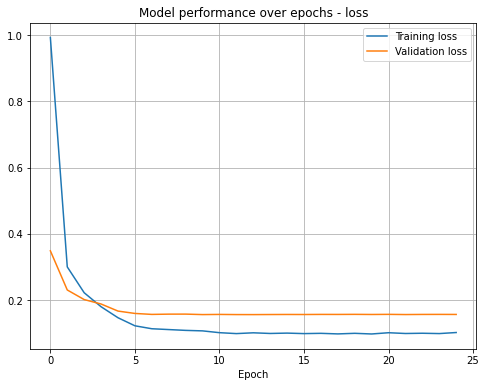

In [0]:
trainer_top20.plot_perf()

In [0]:
trainer_top20.model = trainer_top20.get_best_model()

In [0]:
acc_df = trainer_top20.get_test_accuracy()

In [0]:
acc_df

,Top-1,Top-5
Average (Micro),86.80,95.74
Backpacks,97.90,100.00
Belts,99.07,99.07
Briefs,95.19,100.00
Casual Shoes,80.69,99.61
Flip Flops,85.05,97.79
Formal Shoes,92.45,99.64
Handbags,96.28,99.87
Heels,86.13,99.82
Jeans,99.26,100.00


In [0]:
print(acc_df.to_markdown())

|                       |   Top-1 |   Top-5 |
|:----------------------|--------:|--------:|
| Average (Micro)       |   86.8  |   95.74 |
| Backpacks             |   97.9  |  100    |
| Belts                 |   99.07 |   99.07 |
| Briefs                |   95.19 |  100    |
| Casual Shoes          |   80.69 |   99.61 |
| Flip Flops            |   85.05 |   97.79 |
| Formal Shoes          |   92.45 |   99.64 |
| Handbags              |   96.28 |   99.87 |
| Heels                 |   86.13 |   99.82 |
| Jeans                 |   99.26 |  100    |
| Kurtas                |   93.32 |  100    |
| Perfume and Body Mist |    0    |    0    |
| Sandals               |   84.76 |  100    |
| Shirts                |   97.56 |  100    |
| Socks                 |   92.82 |  100    |
| Sports Shoes          |   84.59 |   99.48 |
| Sunglasses            |  100    |  100    |
| Tops                  |   69.99 |   99.86 |
| Tshirts               |   91.81 |   99.91 |
| Wallets               |   97.62 

In [0]:
processor, trainer_ft, dataloaders_ft = setup_ft(processor=processor, ckpt_path=CKPT_PATH_FT, model=trainer_top20.get_best_model())

INFO:fashion:Creating datasets
INFO:fashion:Created train dataset with 4629 samples
INFO:fashion:Created val dataset with 1158 samples
INFO:fashion:Created test dataset with 5505 samples
INFO:fashion:Creating dataloaders
INFO:fashion:Creating model
INFO:fashion:Creating trainer


In [0]:
# torch.cuda.empty_cache()
trainer_ft.train(50)

INFO:fashion:Running epoch 0/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 4.1762 Acc: 0.2037
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 3.0298 Acc: 0.4767
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 1/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 2.6161 Acc: 0.4796
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 2.1193 Acc: 0.5596
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 2/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 1.7790 Acc: 0.5885
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.6910 Acc: 0.6416
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 3/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 1.3185 Acc: 0.6548
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.5648 Acc: 0.6701
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 4/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 1.0230 Acc: 0.7058
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.3275 Acc: 0.7073
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 5/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.7896 Acc: 0.7505
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1924 Acc: 0.7340
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 6/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.7568 Acc: 0.7600
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1685 Acc: 0.7392
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 7/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.7276 Acc: 0.7676
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1506 Acc: 0.7444
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 8/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.7126 Acc: 0.7747
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1431 Acc: 0.7453
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 9/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6923 Acc: 0.7792
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1334 Acc: 0.7487
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 10/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6796 Acc: 0.7825
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1319 Acc: 0.7504
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 11/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6738 Acc: 0.7870
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1286 Acc: 0.7470
INFO:fashion:Running epoch 12/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6753 Acc: 0.7803
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1281 Acc: 0.7496
INFO:fashion:Running epoch 13/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6665 Acc: 0.7822
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1283 Acc: 0.7513
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 14/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6708 Acc: 0.7794
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1274 Acc: 0.7504
INFO:fashion:Running epoch 15/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6642 Acc: 0.7844
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1274 Acc: 0.7487
INFO:fashion:Running epoch 16/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6679 Acc: 0.7887
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1224 Acc: 0.7539
INFO:fashion:--Saving checkpoint--


INFO:fashion:Running epoch 17/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6695 Acc: 0.7857
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1216 Acc: 0.7522
INFO:fashion:Running epoch 18/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6640 Acc: 0.7853
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1241 Acc: 0.7513
INFO:fashion:Running epoch 19/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6552 Acc: 0.7827
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1267 Acc: 0.7530
INFO:fashion:Running epoch 20/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6521 Acc: 0.7896
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1238 Acc: 0.7504
INFO:fashion:Running epoch 21/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6609 Acc: 0.7881
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1265 Acc: 0.7513
INFO:fashion:Running epoch 22/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6628 Acc: 0.7848
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1228 Acc: 0.7504
INFO:fashion:Running epoch 23/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6595 Acc: 0.7868
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1219 Acc: 0.7504
INFO:fashion:Running epoch 24/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6722 Acc: 0.7892
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1229 Acc: 0.7530
INFO:fashion:Running epoch 25/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6518 Acc: 0.7866
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1265 Acc: 0.7513
INFO:fashion:Running epoch 26/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6556 Acc: 0.7792
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1249 Acc: 0.7496
INFO:fashion:Running epoch 27/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6557 Acc: 0.7859
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1260 Acc: 0.7496
INFO:fashion:Running epoch 28/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6705 Acc: 0.7805
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1263 Acc: 0.7496
INFO:fashion:Running epoch 29/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6681 Acc: 0.7857
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1226 Acc: 0.7504
INFO:fashion:Running epoch 30/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6677 Acc: 0.7792
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1233 Acc: 0.7496
INFO:fashion:Running epoch 31/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6467 Acc: 0.7840
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1263 Acc: 0.7513
INFO:fashion:Running epoch 32/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6645 Acc: 0.7885
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1259 Acc: 0.7504
INFO:fashion:Running epoch 33/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6704 Acc: 0.7814
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1234 Acc: 0.7522
INFO:fashion:Running epoch 34/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6569 Acc: 0.7909
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1240 Acc: 0.7513
INFO:fashion:Running epoch 35/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6675 Acc: 0.7851
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1232 Acc: 0.7522
INFO:fashion:Running epoch 36/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6715 Acc: 0.7814
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1298 Acc: 0.7522
INFO:fashion:Running epoch 37/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6595 Acc: 0.7870
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1249 Acc: 0.7504
INFO:fashion:Running epoch 38/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6589 Acc: 0.7902
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1215 Acc: 0.7522
INFO:fashion:Running epoch 39/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6723 Acc: 0.7840
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1225 Acc: 0.7513
INFO:fashion:Running epoch 40/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6734 Acc: 0.7853
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1205 Acc: 0.7530
INFO:fashion:Running epoch 41/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6692 Acc: 0.7885
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1249 Acc: 0.7487
INFO:fashion:Running epoch 42/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6632 Acc: 0.7840
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1242 Acc: 0.7522
INFO:fashion:Running epoch 43/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6619 Acc: 0.7820
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1247 Acc: 0.7496
INFO:fashion:Running epoch 44/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6685 Acc: 0.7857
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1266 Acc: 0.7504
INFO:fashion:Running epoch 45/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6597 Acc: 0.7848
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1250 Acc: 0.7513
INFO:fashion:Running epoch 46/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6710 Acc: 0.7816
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1217 Acc: 0.7513
INFO:fashion:Running epoch 47/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6577 Acc: 0.7911
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1259 Acc: 0.7539
INFO:fashion:Running epoch 48/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6656 Acc: 0.7853
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1247 Acc: 0.7496
INFO:fashion:Running epoch 49/49
INFO:fashion:----------
INFO:fashion:Iterating through data for phase: train


INFO:fashion:train Loss: 0.6617 Acc: 0.7866
INFO:fashion:Iterating through data for phase: val


INFO:fashion:val Loss: 1.1236 Acc: 0.7530
INFO:fashion:Training complete in 23m 44s
INFO:fashion:Best val Acc: 0.753886


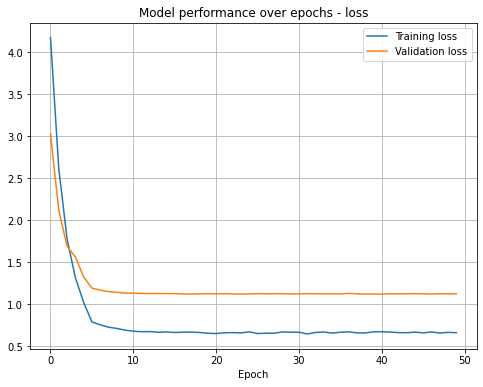

In [76]:
trainer_ft.plot_perf()

In [0]:
trainer_ft.model = trainer_ft.get_best_model()

In [0]:
acc_df_ft = trainer_ft.get_test_accuracy()

In [0]:
acc_df_ft

,Top-1,Top-5
Average (Micro),41.83,62.38
Accessory Gift Set,100.00,100.00
Baby Dolls,0.00,0.00
Bangle,17.39,73.91
Basketballs,90.91,100.00
...,...,...
Umbrellas,100.00,100.00
Waist Pouch,30.77,76.92
Waistcoat,0.00,83.33
Water Bottle,100.00,100.00


In [0]:
print(acc_df_ft.to_markdown())

|                           |   Top-1 |   Top-5 |
|:--------------------------|--------:|--------:|
| Average (Micro)           |   41.83 |   62.38 |
| Accessory Gift Set        |  100    |  100    |
| Baby Dolls                |    0    |    0    |
| Bangle                    |   17.39 |   73.91 |
| Basketballs               |   90.91 |  100    |
| Bath Robe                 |    0    |    0    |
| Beauty Accessory          |    0    |    0    |
| Blazers                   |   -0    |   -0    |
| Body Lotion               |    0    |    0    |
| Body Wash and Scrub       |    0    |    0    |
| Booties                   |   -0    |   -0    |
| Boxers                    |   -0    |   -0    |
| Bra                       |   96.35 |   98.78 |
| Bracelet                  |   85.71 |  100    |
| Camisoles                 |   35.29 |   82.35 |
| Capris                    |   40.38 |   98.08 |
| Caps                      |   81.68 |   92.37 |
| Churidar                  |    0    |   75    |


In [0]:
acc_df_ft[acc_df_ft==-0] = 0

In [82]:
print(acc_df_ft.to_markdown())

|                           |   Top-1 |   Top-5 |
|:--------------------------|--------:|--------:|
| Average (Micro)           |   41.83 |   62.38 |
| Accessory Gift Set        |  100    |  100    |
| Baby Dolls                |    0    |    0    |
| Bangle                    |   17.39 |   73.91 |
| Basketballs               |   90.91 |  100    |
| Bath Robe                 |    0    |    0    |
| Beauty Accessory          |    0    |    0    |
| Blazers                   |    0    |    0    |
| Body Lotion               |    0    |    0    |
| Body Wash and Scrub       |    0    |    0    |
| Booties                   |    0    |    0    |
| Boxers                    |    0    |    0    |
| Bra                       |   96.35 |   98.78 |
| Bracelet                  |   85.71 |  100    |
| Camisoles                 |   35.29 |   82.35 |
| Capris                    |   40.38 |   98.08 |
| Caps                      |   81.68 |   92.37 |
| Churidar                  |    0    |   75    |
